Code to solve and test the unsteady diffusion equation on the interval $[a,b]$ in space and $[0,T]$ in time:
\begin{align*}
  u_t&=u_{xx}, \qquad a < x < b,\; 0\leq t \leq T \\
  u(a,t)&=u(b,t)=0, \quad u(x,0) = f(x) 
\end{align*}
To simplify, we take $a=0$ and $b=1$.

* Import libraries

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
from matplotlib import cm
plt.rcParams.update(newparams)

* Function to construct tridiagonal matrices

In [29]:
def tridiag(v, d, w, N):
    # Help function 
    # Returns a tridiagonal matrix A=tridiag(v, d, w) of dimension N x N.
    e = np.ones(N)        # array [1,1,...,1] of length N
    A = v*np.diag(e[1:],-1)+d*np.diag(e)+w*np.diag(e[1:],1)
    return A

* Implement the solver. 

In [30]:
def forward_euler(f, M=10, N=100, T=0.5):
    # Solve the heat equation
    # u_t=u_xx, 0<=x<=1
    # with boundary conditions u(0,t)=u(1,t)=0
    # and initial values u(x,0)=f(x)
    # over the time interval from 0 to T.
    # Input: 
    #       f: function with the initial values
    #       M, N: number of grid intervals in the x- and t directions
    #       T: end of integration
    # Output: 
    #       x, t: the gridpoints in the x- and t- directions 
    #       U: An array with the numerical solution.

    # Set the stepsizes
    h = 1/M     # Stepsize in space
    k = T/N     # Stepsize in time

    r = k/h**2
    # Print the stepsizes, and r=k/h^2.
    print('h={:.4f}, k={:.4f}, r={:.4f}'.format(h,k,r))

    U = np.zeros((M+1,N+1))    # Array to store the solution, boundaries included.
    x = np.linspace(0,1,M+1)   # Gridpoints on the x-axis
    t = np.linspace(0,T,N+1)   # Gridpoints on the t-axis
    U[:,0] = f(x)              # Initial values
    
    A = tridiag(r,1-2*r,r,M-1);

    # Main loop 
    for n in range(N):
        U[1:-1, n+1] = A.dot(U[1:-1,n])  
    return x, t, U

* Implement the plotting function

In [31]:
def plot_solution(x, t, U, txt='Solution'):
    # Plot the solution of the heat equation
    
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    T, X = np.meshgrid(t,x)
    # ax.plot_wireframe(T, X, U)
    ax.plot_surface(T, X, U, cmap=cm.coolwarm)
    ax.view_init(azim=30)              # Rotate the figure
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title(txt);

* Make a test example.
* Here we force some exact solution manifacturing $u$, namely
\begin{align*}
    u(x,0)&=\sin(\pi x)\\
    u(x,t)&=e^{-\pi^2 t}\sin(\pi x)
\end{align*}

In [32]:
# Example 1
def f1(x):
    return np.sin(np.pi*x)
    

# Exact solution for example 1:
def uex_1(x,t):  
    return np.exp(-np.pi**2*t)*np.sin(np.pi*x)


* Solve it. 
* Plot the solution.
* Compare witht the exact solution (if available)

h=0.0500, k=0.0013, r=0.5063


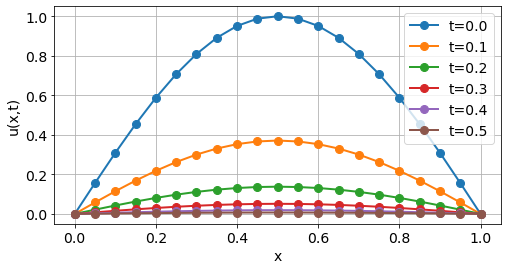

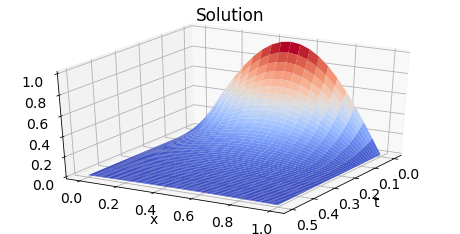

In [33]:
# Solve the equation
x, t, U = forward_euler(f1, M=20, N=395, T=0.5)

# Plot the solution at some points in time
plt.figure(1)
plt.clf()
tplots = np.linspace(0,t[-1],6)
k = t[1]-t[0]
for tn in tplots:
    n = int(tn/k)
    tn = n*k
    plt.plot(x,U[:,n],'-o',label='t={:.1f}'.format(tn))
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.show()

# Make a 3-d plot
plot_solution(x, t, U, txt='Solution')
plt.show()

h=0.2000, k=0.0005, r=0.0125


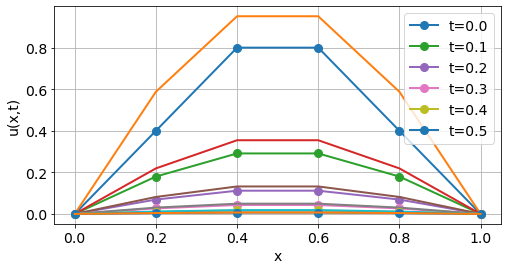

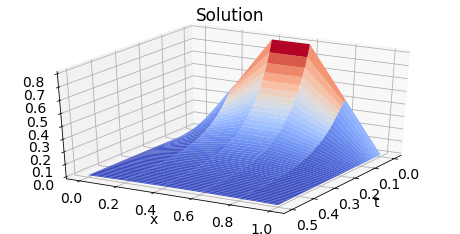

In [35]:
# Solve the equation

def f2(x):
    y = np.copy(x)
    for i, xi in enumerate(x):
        if xi < 1/2:
            y[i] = 2*xi
        else:
            y[i] = 2*(1-xi)
    return y

x, t, U = forward_euler(f2, M=5, N=1000, T=0.5)

# Plot the solution at some points in time
plt.figure(1)
plt.clf()
tplots = np.linspace(0,t[-1],6)
k = t[1]-t[0]
anal_sol = np.zeros((len(x), len(t)))
for i, tn in enumerate(tplots):
    n = int(tn/k)
    tn = n*k
    plt.plot(x,U[:,n],'-o',label='t={:.1f}'.format(tn))
    anal_sol[:,i] = uex_1(x,tn)
    plt.plot(x, anal_sol[:,i])
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.show()

# Make a 3-d plot
plot_solution(x, t, U, txt='Solution')
plt.show()

In [65]:
def forward_euler_OG(f, M=10, N=100, T = 0.5):#h spacestep, M spacegrid, h timestep, N time grid
    h, k = 1/M, T/N
    r = k/h**2
    
    U = np.zeros((N+1,M+1))    # Array to store the solution, boundaries included.
    x = np.linspace(0,1,M+1)   # Gridpoints on the x-axisS
    t = np.linspace(0,T,N+1)   # Gridpoints on the t-axis
    U[0] = f(x)              # Initial values
    qm = np.zeros(np.shape(U[0,1:M]))
    qm[-1] = U[0,-1]
    
    tridiag = np.diag(np.ones(M - 2), -1) + np.diag(np.ones(M - 2), 1) - 2*np.diag(np.ones(M - 1))
    C = np.diag(np.ones(M-1)) + r * tridiag
    print(np.shape(C))
    for tn in range(1, N):
        U[tn,1:M] = C @ U[tn - 1,1:M] + r*qm
    return x ,t, U.transpose()
        
        
        
        
    

(9, 9)


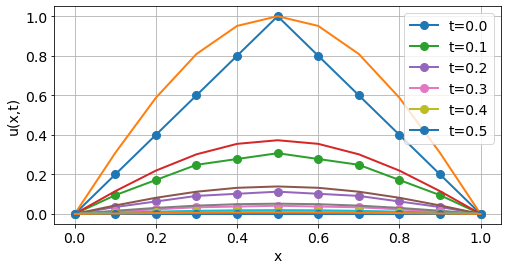

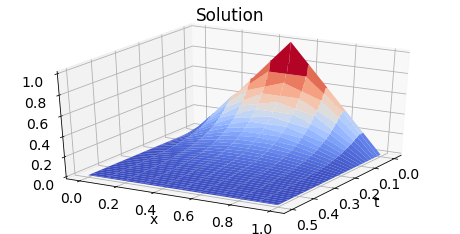

In [66]:
# Solve the equation

def f2(x):
    y = np.copy(x)
    for i, xi in enumerate(x):
        if xi < 1/2:
            y[i] = 2*xi
        else:
            y[i] = 2*(1-xi)
    return y

x, t, U = forward_euler_OG(f2, M=10, N=100, T=0.5)

# Plot the solution at some points in time
plt.figure(1)
plt.clf()
tplots = np.linspace(0,t[-1],6)
k = t[1]-t[0]
anal_sol = np.zeros((len(x), len(t)))
for i, tn in enumerate(tplots):
    n = int(tn/k)
    tn = n*k
    plt.plot(x,U[:,n],'-o',label='t={:.1f}'.format(tn))
    anal_sol[:,i] = uex_1(x,tn)
    plt.plot(x, anal_sol[:,i])
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.show()

# Make a 3-d plot
plot_solution(x, t, U, txt='Solution')
plt.show()

1
